# MLP 识别 MNIST 数据集

- author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## 1 数据集介绍

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 训练集 (training set) 由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 测试集(test set) 也是同样比例的手写数字数据.

### 1.1 导入数据集

OpenML是一个在线的机器学习平台，它提供了大量的标准数据集，可以用于测试和比较不同的机器学习算法。`fetch_openml`函数用于从OpenML数据集库中下载 MNIST 数据集。

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np


# 从OpenML上下载MNIST数据集
mnist = fetch_openml("mnist_784")

In [3]:
X = mnist.data.to_numpy() / 255  # 归一化到0~1
y = mnist.target.to_numpy().astype(np.int8)  # 转换为整数标度

### 1.2 部分数据展示

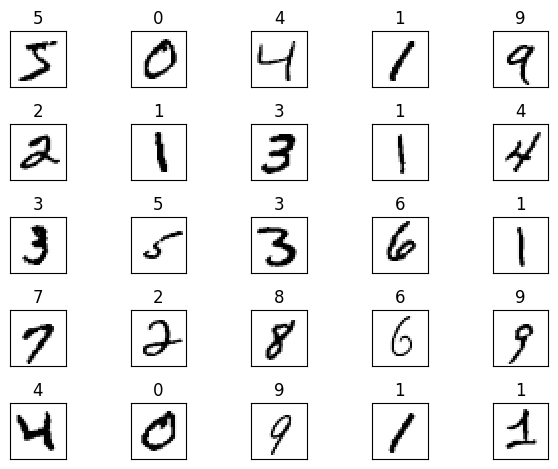

In [4]:
# 用于绘制部分测试数据的图片，在图片旁标注预测结果。当传入y_real（真实值）的时候，该
# 函数会标红预测错误的图片
def show_example(X, y_pred, y_real=None):
    # 创建一个5x5的子图，共25个图像
    fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
    ax = ax.flatten()

    # 显示前25个图像及其标签
    for i in range(25):
        img = X[i].reshape(28, 28)  # 将图像数据从784维向量转换为28x28的矩阵
        if y_real is None or y_pred[i] == y_real[i]:
            ax[i].imshow(img, cmap="Greys", interpolation="nearest")  # 显示图像
        else:
            ax[i].imshow(img, cmap="Reds", interpolation="nearest")  # 显示被错误预测的图像
        ax[i].set_title(y_pred[i])  # 显示标签

    ax[0].set_xticks([])  # 去除坐标轴
    ax[0].set_yticks([])  # 去除坐标轴
    plt.tight_layout()  # 自动调整子图之间的间距


show_example(X, y)
plt.show()

### 1.3 划分训练集和测试集


使用`train_test_split`函数将数据集划分为训练集和测试集，并将结果保存在了四个变量中：X_train、X_test、y_train和y_test。

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 2 使用 MLPClassifier 进行训练


MLP又名多层感知机，也叫人工神经网络（ANN，Artificial Neural Network），除了输入输出层，它中间可以有多个隐藏层，如果没有隐藏层即可解决线性可划分的数据问题。

### 2.1 训练模型

In [7]:
from sklearn.neural_network import MLPClassifier

# hidden_layer_sizes: 指定多层感知器（MLP）的隐藏层的大小
# max_iter：最大迭代次数。
# alpha：L2正则化参数。
# solver：优化器。{‘lbfgs’, ‘sgd’, ‘adam’}
# tol：优化器收敛阈值。
# verbose: 打印训练日志
# learning_rate_init：初始学习率。
# random_state：随机种子。
# early_stopping: 当验证准确率没有提高时提前停止
# n_iter_no_change: 连续几个时期，验证准确率没有提高至少tol时终止训练

mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 64, 32),
    max_iter=100,
    batch_size=128,
    alpha=1e-4,
    solver="sgd",
    activation="relu",
    tol=1e-6,
    verbose=True,
    random_state=1,
    learning_rate_init=0.1,
    early_stopping=True,
    n_iter_no_change=5,
)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.40883869
Validation score: 0.932857
Iteration 2, loss = 0.17634926
Validation score: 0.954107
Iteration 3, loss = 0.14558467
Validation score: 0.954643
Iteration 4, loss = 0.12233231
Validation score: 0.952143
Iteration 5, loss = 0.11141668
Validation score: 0.961250
Iteration 6, loss = 0.10159740
Validation score: 0.964821
Iteration 7, loss = 0.09517470
Validation score: 0.963750
Iteration 8, loss = 0.08745082
Validation score: 0.963393
Iteration 9, loss = 0.08181357
Validation score: 0.963929
Iteration 10, loss = 0.07973868
Validation score: 0.963393
Iteration 11, loss = 0.07666443
Validation score: 0.960357
Iteration 12, loss = 0.07379153
Validation score: 0.963750
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Stopping.


,hidden_layer_sizes,"(32, ...)"
,activation,'relu'
,solver,'sgd'
,alpha,0.0001
,batch_size,128
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,1


### 2.2 模型预测准确度

In [8]:
from sklearn.metrics import accuracy_score


y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9615


### 2.3 绘制预测值和图片

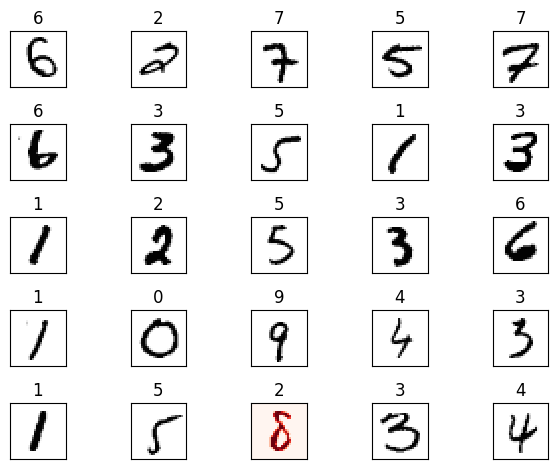

In [9]:
show_example(X_test, y_pred, y_test)
plt.show()

### 2.4 绘制学习曲线

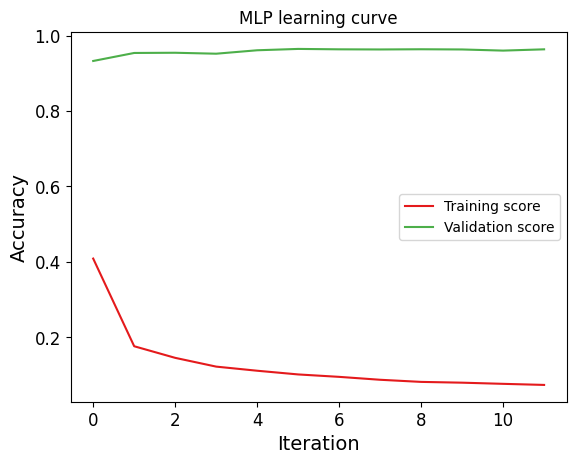

In [10]:
palette = plt.get_cmap("Set1")


plt.plot(mlp.loss_curve_, c=palette(0))
plt.plot(mlp.validation_scores_, c=palette(2))

plt.title("MLP learning curve")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(["Training score", "Validation score"])